In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In this cell, we define input and output fuzzy terms and universes

In [2]:
x1 = ctrl.Antecedent(np.linspace(0, 1, 1000), 'healthy') # 1000 points between 0 to 1 inclusive
x2 = ctrl.Antecedent(np.linspace(0, 1, 1000), 'cancer') # 1000 points between 0 to 1 inclusive
y = ctrl.Consequent(np.linspace(0.004, 0.01, 1000), 'dose') # 1000 points between 0.004 to 0.01 inclusive

Here we defined membership function of healthy cells input (3 terms: low, medium, high)

c:\Users\erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


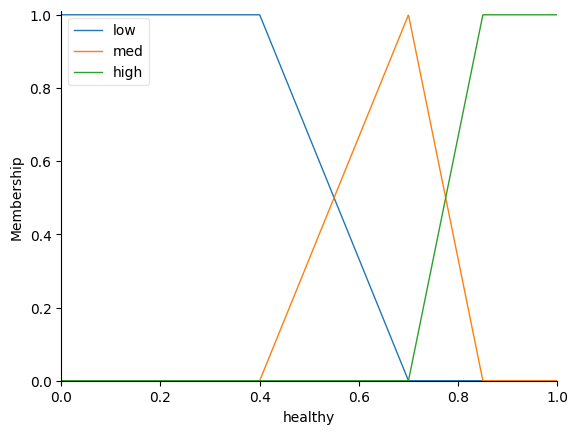

In [3]:
x1['low'] = fuzz.trapmf(x1.universe, [0, 0, 0.4, 0.7]) # trapezoidal membership
x1['med'] = fuzz.trimf(x1.universe, [0.4, 0.7, 0.85]) # triangular membership
x1['high'] = fuzz.trapmf(x1.universe, [0.7, 0.85, 1, 1]) # trapezoidal membership

x1.view()

Here we defined membership function of cancer cells input (3 terms: low, medium, high)

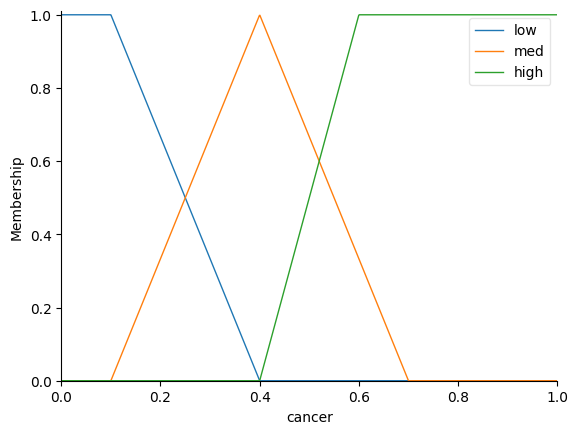

In [4]:
x2['low'] = fuzz.trapmf(x2.universe, [0, 0, 0.1, 0.4]) # trapezoidal membership
x2['med'] = fuzz.trimf(x2.universe, [0.1, 0.4, 0.7]) # triangular membership
x2['high'] = fuzz.trapmf(x2.universe, [0.4, 0.6, 1, 1]) # trapezoidal membership

x2.view()

Here we defined membership function of drug dosage output (5 terms: very low, low, medium, high, very high)

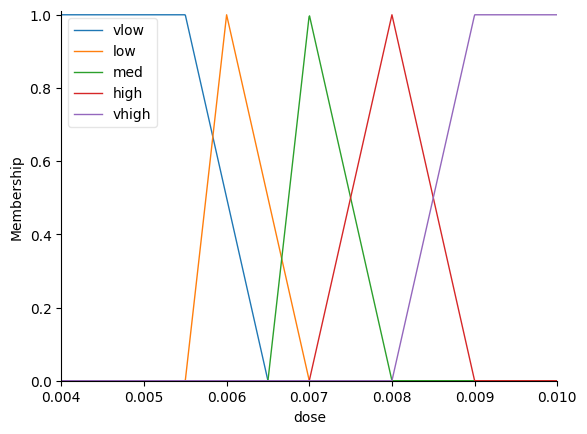

In [5]:
y['vlow'] = fuzz.trapmf(y.universe, [0, 0, 5.5e-3, 6.5e-3]) # trapezoidal membership
y['low'] = fuzz.trimf(y.universe, [5.5e-3, 6e-3, 7e-3]) # trapezoidal membership
y['med'] = fuzz.trimf(y.universe, [6.5e-3, 7e-3, 8e-3]) # triangular membership
y['high'] = fuzz.trimf(y.universe, [7e-3, 8e-3, 9e-3]) # trapezoidal membership
y['vhigh'] = fuzz.trapmf(y.universe, [8e-3, 9e-3, 10e-3, 10e-3]) # trapezoidal membership

y.view()

Here we create rules based on the rule matrix
<br>
<img src="rule_matrix.png">

In [6]:
list_rules = []
list_rules.append(ctrl.Rule(x1['low'] & x2['low'], y['low']))
list_rules.append(ctrl.Rule(x1['low'] & x2['med'], y['med']))
list_rules.append(ctrl.Rule(x1['low'] & x2['high'], y['vhigh']))
list_rules.append(ctrl.Rule(x1['med']& x2['low'], y['low']))
list_rules.append(ctrl.Rule(x1['med']& x2['med'], y['med']))
list_rules.append(ctrl.Rule(x1['med']& x2['high'], y['high']))
list_rules.append(ctrl.Rule(x1['high'] & x2['low'], y['vlow']))
list_rules.append(ctrl.Rule(x1['high'] & x2['med'], y['low']))
list_rules.append(ctrl.Rule(x1['high'] & x2['high'], y['med']))

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

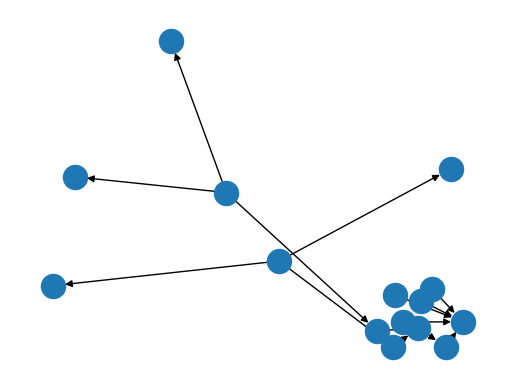

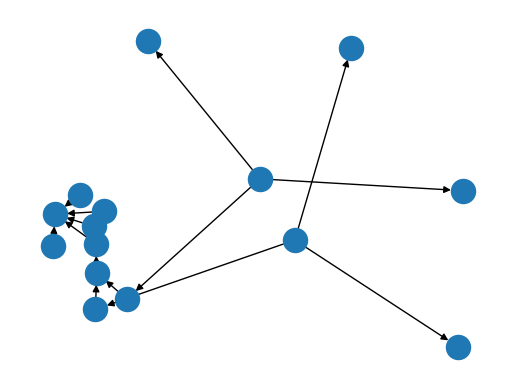

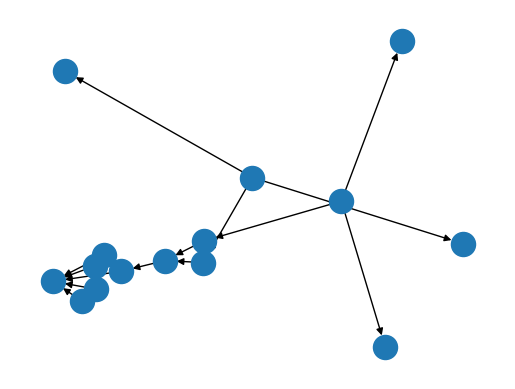

In [7]:
list_rules[0].view()
list_rules[1].view()
list_rules[2].view()

Now we create the fuzzy controller based on rule list we created out of input and output terms

In [8]:
dosage_ctrl = ctrl.ControlSystem(list_rules)

Now based on the above controller we create a system simulation to pass testing inputs and see the output

In [9]:
dosage = ctrl.ControlSystemSimulation(dosage_ctrl)

With having simulalor at hand, we can pass in inputs (in our case healthy and cancer cells density) and see the computation graphs and result

Appropriate dosage: 0.007882584222348568


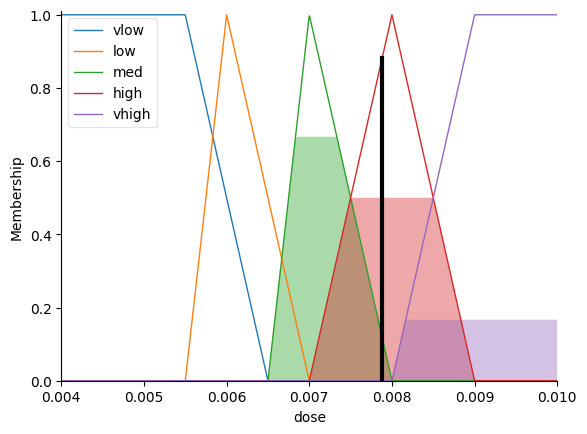

In [10]:
dosage.input['healthy'] = 0.65
dosage.input['cancer'] = 0.5
dosage.compute()

print (f'Appropriate dosage: {dosage.output["dose"]}')
y.view(sim=dosage)

Now the second input pair, since the density of cancer cells got bigger and healthy cells reduced, we expect the drug dosage to increase 

Appropriate dosage: 0.008694430352877827


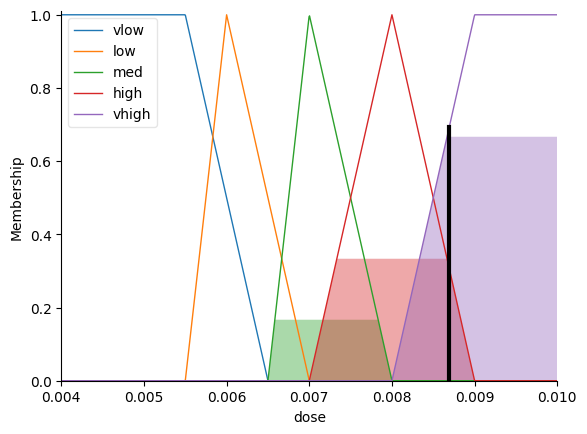

In [11]:
dosage.input['healthy'] = 0.5
dosage.input['cancer'] = 0.65
dosage.compute()

print (f'Appropriate dosage: {dosage.output["dose"]}')
y.view(sim=dosage)

In [12]:
for var in dosage_ctrl.rules:
    print(var)

IF healthy[low] AND cancer[low] THEN dose[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF healthy[low] AND cancer[med] THEN dose[med]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF healthy[low] AND cancer[high] THEN dose[vhigh]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF healthy[med] AND cancer[low] THEN dose[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF healthy[med] AND cancer[med] THEN dose[med]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF healthy[med] AND cancer[high] THEN dose[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF healthy[high] AND cancer[low] THEN dose[vlow]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF healthy[high] AND cancer[med] THEN dose[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF healthy[high] AND cancer[high] THEN dose[med]
	AND aggregation function : fmin
	OR ag